In [6]:
##Importamos librerias 

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns", None)

In [7]:
df = pd.read_csv("CSV/data_limpia_1.csv", index_col=0)

df.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,overtime,remotework,age,distancefromhome,education,employeenumber,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary
0,no,non travel,unknown,unknown,M,research director,no,yes,51,6,3,1,1,3,5,3,16280.83,42330.17,7,13,3,3,0,5,3,20,15,15,195370.00
1,no,non travel,unknown,life sciences,M,manager,NaN,yes,52,1,4,2,1,2,5,3,16665.83,43331.17,0,14,3,1,1,5,3,33,11,9,199990.00
2,no,travel rarely,research & development,technical degree,M,manager,no,yes,42,4,2,3,1,3,5,4,16026.67,41669.33,1,11,3,4,0,3,3,22,11,15,192320.00
3,no,travel rarely,unknown,medical,F,research director,NaN,no,47,2,4,4,1,3,4,3,14307.50,37199.50,3,19,3,2,2,2,3,20,5,6,171690.00
4,no,non travel,unknown,technical degree,F,sales executive,no,no,46,3,3,5,1,4,4,1,12783.92,33238.20,2,12,3,4,1,5,3,19,2,8,153407.04


In [9]:
df.shape


(1614, 29)

In [8]:
df["attrition"].value_counts()

attrition
no     1355
yes     259
Name: count, dtype: int64

In [13]:
abandono = {"grupo": ["Abandono","Empleados actuales"], "valores": [259,1355]}
df_abandono = pd.DataFrame(abandono)
df_abandono

,grupo,valores
0,Abandono,259
1,Empleados actuales,1355


C:\Users\irene\AppData\Local\Temp\ipykernel_13588\2025337160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="grupo", y="valores", data=df_abandono, palette="mako");


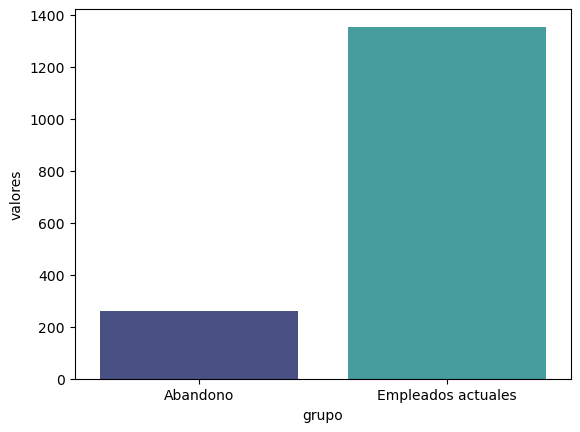

In [16]:
sns.barplot(x="grupo", y="valores", data=df_abandono, palette="mako");

<Axes: xlabel='gender', ylabel='Count'>

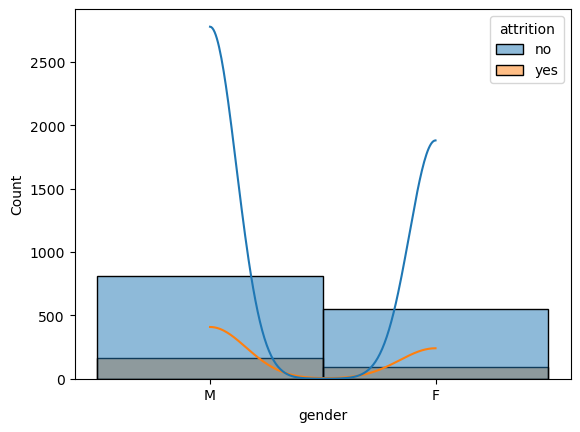

In [20]:
sns.histplot(data = df, x = "gender", hue = "attrition", kde = True, color= "blue")
# plt.title("Edad según rotación")
# plt.xlabel("Edad")
# plt.ylabel("Frecuencia")

In [32]:
pd.crosstab(df["attrition"], df["gender"], normalize="columns")*100

gender,F,M
attrition,,
no,85.069984,83.213182
yes,14.930016,16.786818


In [34]:
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.
    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

<Axes: xlabel='salary', ylabel='attrition'>

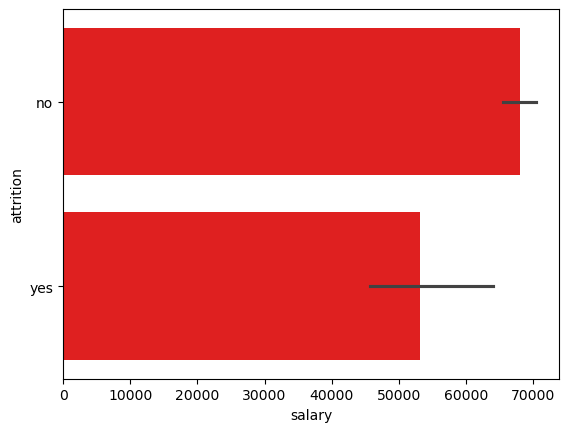

In [43]:
sns.barplot(data = df, x = "salary", y="attrition", color= "red")

In [35]:
normalidad(df,"salary")

Para la columna salary los datos no siguen una distribución normal.


In [ ]:
mannwhitneyu()

In [ ]:
grupo_a = df[df['jobsatisfaction'] >= 3]
grupo_b = df[df['jobsatisfaction'] < 3]